In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from typing import Optional, Sequence
from coba.experiments.results import CustomResult
import numpy as np

from coba import CobaRandom, Environments, RandomLearner, Experiment, VowpalSoftmaxLearner, VowpalBagLearner, \
    VowpalEpsilonLearner, SimpleEvaluation
from coba import VowpalCoverLearner, VowpalRegcbLearner, VowpalSquarecbLearner, VowpalOffPolicyLearner, CorralLearner
from coba.environments import LambdaSimulation
# from coba.experiments.tasks import SimpleEvaluation
from coba.primitives import Context, Action

# Run Simulation

In [3]:
import pandas as pd
source_df = pd.read_csv("lambda_logs_6.csv")
# Uncomment to utilze rewards 
# source_df.rename(columns={"rewards": "xxx"}, inplace=True)

In [4]:
from coba.environments.banditreplay import BanditReplay

environments = Environments([BanditReplay(source_df, take=5000, actions=[0,1])]).shuffle(n=4)
learners = [
    VowpalEpsilonLearner(features=[1, 'x', 'a', 'ax']),
    VowpalSoftmaxLearner(features=[1, 'x', 'a', 'ax']),
    VowpalBagLearner(features=[1, 'x', 'a', 'ax']),
    VowpalOffPolicyLearner(features=[1, 'x', 'a', 'ax']),
]

learners.append(RandomLearner())

result = Experiment(
    environments,
    learners,
    evaluation_task=SimpleEvaluation(record=['reward','probability','action','context', 'ope_loss'])
).run()
result.__class__ = CustomResult

2023-02-08 17:05:41 -- pid-27345  -- Processing chunk...
2023-02-08 17:05:41 -- pid-27345  --   * Recording Learner 0 parameters... (0.0 seconds) (completed)
2023-02-08 17:05:41 -- pid-27345  --   * Recording Learner 1 parameters... (0.0 seconds) (completed)
2023-02-08 17:05:41 -- pid-27345  --   * Recording Learner 2 parameters... (0.0 seconds) (completed)
2023-02-08 17:05:41 -- pid-27345  --   * Recording Learner 3 parameters... (0.0 seconds) (completed)
2023-02-08 17:05:41 -- pid-27345  --   * Recording Learner 4 parameters... (0.0 seconds) (completed)
2023-02-08 17:05:41 -- pid-27345  --   * Recording Environment 0 statistics... (0.0 seconds) (completed)
2023-02-08 17:05:41 -- pid-27345  --   * Peeking at Environment 0... (0.15 seconds) (completed)
2023-02-08 17:05:41 -- pid-27345  --   * Evaluating Learner 0 on Environment 0... (0.24 seconds) (completed)
2023-02-08 17:05:41 -- pid-27345  --   * Peeking at Environment 0... (0.15 seconds) (completed)
2023-02-08 17:05:42 -- pid-27345

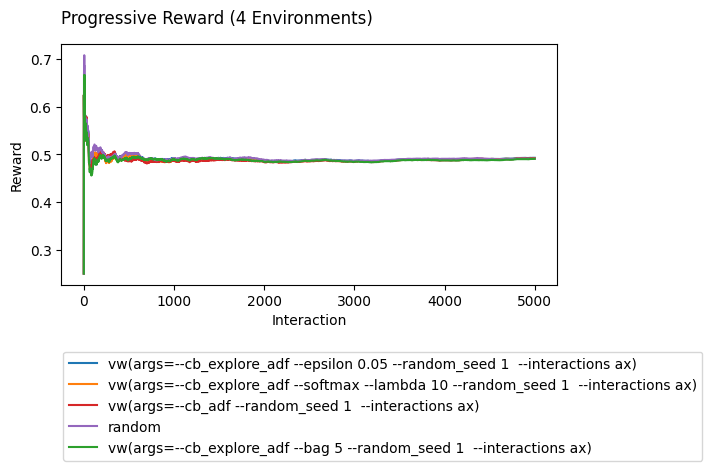

In [5]:
result.plot_learners()

In [6]:
# without rewards
result.eval_metrics()

,learners,reward,action,probability,ope_loss,environment_variance
learner_id,,,,,,
0,vw: --cb_explore_adf --epsilon 0.05 --random_s...,0.49305,0.19665,0.951226,-0.061600,0.000006
1,vw: --cb_explore_adf --softmax --lambda 10 --r...,0.49195,0.41345,0.537303,-0.061784,0.000008
3,vw: --cb_adf --random_seed 1 --interactions ax,0.49170,0.18200,0.999675,-0.061627,0.000002
4,random: N/A,0.49120,0.49120,0.500000,0.000000,0.000008
2,vw: --cb_explore_adf --bag 5 --random_seed 1 ...,0.49090,0.21005,0.831835,-0.062186,0.000010


In [7]:
df = result.interactions.to_pandas()
d = df[(df['environment_id'] == 0) & (df['learner_id'] == 0)]

array([[<AxesSubplot: title={'center': 'action'}>]], dtype=object)

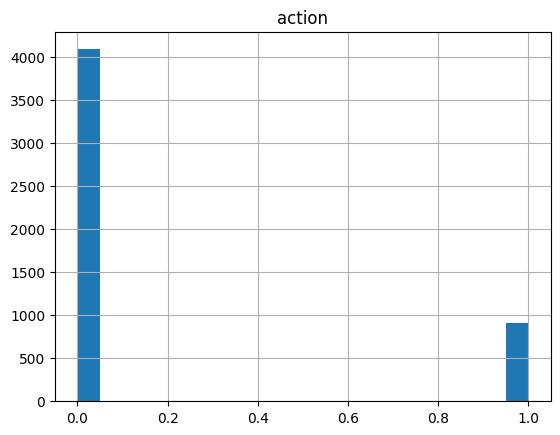

In [8]:
d.hist(column='action', bins=20)

array([[<AxesSubplot: title={'center': 'action'}>]], dtype=object)

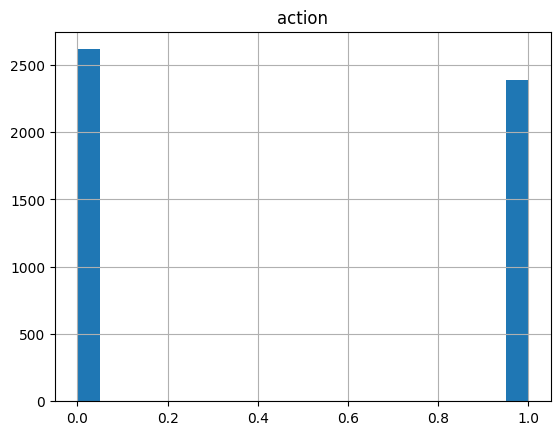

In [9]:
source_df.hist(column='action', bins=20)